## Convolutional NN ##

In [4]:
import torch
import torch.nn as nn 

# Library to traverse graph 
import torch.nn.functional as F 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Data ###

In [5]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from sklearn.metrics import confusion_matrix

In [6]:
# Convert MNIST Image Files into Tensor of 4-Dimensions (# of images, h, w, color channels)
transform = transforms.ToTensor()

In [7]:
# Train Data
train_data = datasets.MNIST(root = "",train = True, download = True, transform = transform)

In [8]:
test_data = datasets.MNIST(root = "", train = False, download = True, transform = transform)

### Convolution and Pooling Layers (BIG PICTURE AND IDEA) ###

In [10]:
# Create a small batch size for images (10 images)
train_loader = DataLoader(train_data, batch_size = 10, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle=False)

In [10]:
# Define our CNN Model
    # Describe convolutional layer and what it is doing (Ex will have 2)
conv1 = nn.Conv2d(1, 6, 3, 1) # input, output (filter), kernel size, stride length
conv2 = nn.Conv2d(6, 16, 3, 1) # 6 & 16 are random here

In [11]:
# Grab 1 MNIST image/record
for i, (X_train, y_train) in enumerate(train_data): 
    break

In [12]:
X_train

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [13]:
x = X_train.view(1, 1, 28,28) # one batch, 1 image, w, h  - before it was only 1,28,28 or one image, w, h

In [14]:
# Perform our first convolution
x = F.relu(conv1(x)) # Activation F(x)

In [15]:
# Post convolution
"""
1. Single image
2. 6 is the filters
3. width height, in this case sinse the outside of our images are black, it shrinks it, set padding if you dont want this to happen. 
    Also, recall convolution gets rid of 2 sides in a 3x3 matrix
"""
x.shape # torch.Size([1, 6, 26, 26])

torch.Size([1, 6, 26, 26])

In [16]:
# Pass through the pooling layer
x = F.max_pool2d(x, 2,2) # Kernal of 2 and stride of 2

In [17]:
x.shape #torch.Size([1, 6, 13, 13]) --> IT HAS CUT DOWN THE IMAGE! 

torch.Size([1, 6, 13, 13])

In [18]:
# Now do the second convolutional layer
x = F.relu(conv2(x))

In [19]:
x.shape # torch.Size([1, 16, 11, 11]) --> got rid of 2!!! no padding remember convolution gets the outside off by 2 with 3x3

torch.Size([1, 16, 11, 11])

In [20]:
# Pooling layer
x = F.max_pool2d(x, 2, 2)

In [21]:
x.shape # torch.Size([1, 16, 5, 5])

torch.Size([1, 16, 5, 5])

### Creating the Model! ###

In [22]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self): 
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        
        # Fully Connected Layers (Ex 3!)
        self.fc1 = nn.Linear(5*5*16, 120) # In features, the pizes filter, w, h and outfeatures, 120 arbitrary
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) # Neurons at random except for final # 10 as there are ten numbers

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2) # 2x2 kernal and stride 2

        # Second pass
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)

        # Review to flatten it out
        x = x.view(-1, 16*5*5) # negative -1 so that we can vary the batch size

        # Fully Connected Layers 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return F.log_softmax(x, dim=1)

In [23]:
# Create an instance 
torch.manual_seed(41)

model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [24]:
# Loss Function Optimizer

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

### Train it and Test it! ###

In [25]:
# Lets keep track of time! 
import time
start_time = time.time()

# Create Vars to track 
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []


# For loop of Epochs
for i in range(epochs): 

    trn_corr = 0
    tst_corr = 0
    
    # Train
    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1 #start our batches at 1
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1] # Add up the number of correct predictions, Indexed off the first point
        batch_corr = (predicted == y_train).sum() # How many we got correct 
        trn_corr += batch_corr # keep track as we go along
        
        # update params and print results 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b % 600 == 0: 
            print(f"Epoch: {i}")
            print(f"Batch: {b}")
            print(f"Loss: {loss.item()}")
            print("-------------------------------")

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Test! 
    with torch.no_grad(): # No gradient so we don't update our weights and biases with test data
        for b, (X_test, y_test) in enumerate(test_loader): 
            y_val = model(X_test)
            predicted = torch.max(y_val, 1)[1]
            tst_corr += (predicted == y_test).sum()

        loss = criterion(y_val, y_test)
        test_losses.append(loss)
        test_correct.append(tst_corr)





current_time = time.time()
total_time = current_time - start_time

print(f"Train Time: {total_time/60} minutes")

Epoch: 0
Batch: 600
Loss: 0.16236090660095215
-------------------------------
Epoch: 0
Batch: 1200
Loss: 0.1614551544189453
-------------------------------
Epoch: 0
Batch: 1800
Loss: 0.5041669607162476
-------------------------------
Epoch: 0
Batch: 2400
Loss: 0.10426308214664459
-------------------------------
Epoch: 0
Batch: 3000
Loss: 0.007077544927597046
-------------------------------
Epoch: 0
Batch: 3600
Loss: 0.3652905821800232
-------------------------------
Epoch: 0
Batch: 4200
Loss: 0.0037760832346975803
-------------------------------
Epoch: 0
Batch: 4800
Loss: 0.0013758999994024634
-------------------------------
Epoch: 0
Batch: 5400
Loss: 0.04505983740091324
-------------------------------
Epoch: 0
Batch: 6000
Loss: 0.0005676982691511512
-------------------------------
Epoch: 1
Batch: 600
Loss: 0.0040985336527228355
-------------------------------
Epoch: 1
Batch: 1200
Loss: 0.26344460248947144
-------------------------------
Epoch: 1
Batch: 1800
Loss: 0.0015710301231592894

### Graph it! ###

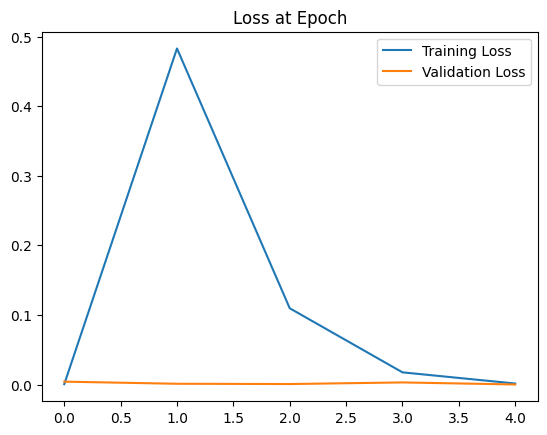

In [26]:
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label = "Training Loss")
plt.plot(test_losses, label = "Validation Loss")
plt.title("Loss at Epoch")
plt.legend()
plt.show()

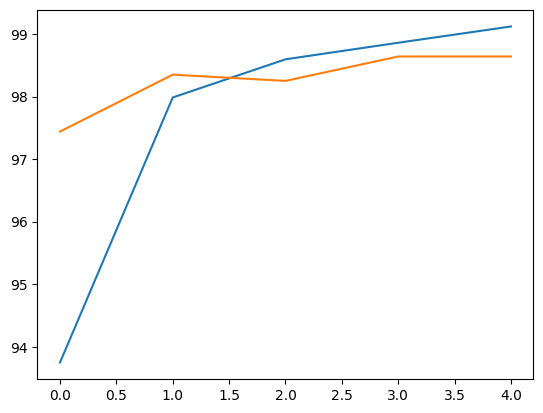

In [27]:
plt.plot([t/600 for t in train_correct], label = "Training Accuracy")
plt.plot([t/100 for t in test_correct], label = "Validation Accuracy")